# 1) Probleme genel bakış


# 2) Veriyi Toplama 

veri: https://www.kaggle.com/datasets/himanshunakrani/student-study-hours?resource=download

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


source = pd.read_csv("score.csv")



# 3) Veriyi İncelemek 

In [4]:
print(source.head()) 

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


In [5]:
source.shape

(25, 2)

In [6]:
source.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


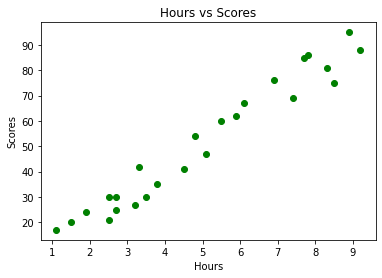

In [7]:
# use the scatter method to create a scatter plot
plt.scatter(x= source['Hours'], y= source['Scores'], color='green')
#  label the axioms 
plt.xlabel("Hours")
plt.ylabel("Scores")

# Title of the plot

plt.title("Hours vs Scores")

plt.show()

#4) Veriyi Modele Uygun Hale Getir

In [8]:
# Splitting the data 
# btween dependant and features variables, x is the features and y is the dependent 
x = source["Hours"]
y = source["Scores"]

In [9]:
print(x)
print(y)

0     2.5
1     5.1
2     3.2
3     8.5
4     3.5
5     1.5
6     9.2
7     5.5
8     8.3
9     2.7
10    7.7
11    5.9
12    4.5
13    3.3
14    1.1
15    8.9
16    2.5
17    1.9
18    6.1
19    7.4
20    2.7
21    4.8
22    3.8
23    6.9
24    7.8
Name: Hours, dtype: float64
0     21
1     47
2     27
3     75
4     30
5     20
6     88
7     60
8     81
9     25
10    85
11    62
12    41
13    42
14    17
15    95
16    30
17    24
18    67
19    69
20    30
21    54
22    35
23    76
24    86
Name: Scores, dtype: int64


In [10]:
import sklearn.model_selection
X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(x, y, train_size= 0.8, test_size=0.2)

In [11]:
print(X_train) # the rows are automatically scrambled

6     9.2
7     5.5
24    7.8
18    6.1
19    7.4
4     3.5
13    3.3
3     8.5
16    2.5
9     2.7
20    2.7
8     8.3
11    5.9
17    1.9
1     5.1
22    3.8
12    4.5
2     3.2
5     1.5
15    8.9
Name: Hours, dtype: float64


In [12]:
print(Y_train)

6     88
7     60
24    86
18    67
19    69
4     30
13    42
3     75
16    30
9     25
20    30
8     81
11    62
17    24
1     47
22    35
12    41
2     27
5     20
15    95
Name: Scores, dtype: int64


In [13]:
print(X_train.shape) # it has to be an array for sklearn therefore we have to convert its type to array 
print(type(X_train)) # As you can see it is not an array 
X_train = np.array(X_train)
X_test = np.array(X_test) 
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print(type(X_train))


(20,)
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [14]:
X_train.shape

(20,)

In [25]:
X_train = X_train.reshape(-1, 1) # this means reshape the array such that there is one column -1 means figure out how many rows to satisfy our condition 
print(X_train.shape)
X_test = X_test.reshape(5, 1)
Y_train = Y_train.reshape(-1, 1)
Y_test = Y_test.reshape(-1, 1)
print(Y_train.shape)

(20, 1)
(20, 1)


# 5) Model Seçimi ve modelin eğitilmesi


In [26]:
import sklearn.linear_model
lin_model = sklearn.linear_model.LinearRegression()
lin_model.fit(X_train, Y_train) #train with the training features and the results based on them 

LinearRegression()

#6) Modelin Optimizasyonu

In [29]:
import sklearn.metrics 
predictions = lin_model.predict(X_test)
print(predictions) # predicted results based on features
print(X_test) # features 

[[26.75500455]
 [68.72746343]
 [13.40013127]
 [48.69515351]
 [76.3588196 ]]
[[2.5]
 [6.9]
 [1.1]
 [4.8]
 [7.7]]


In [31]:
for i in range(len(X_test)):
    print(f"{i}: Gerçek Değer: {Y_test[i]} - Tahmin: {predictions[i]} ") # the real values vs predictions

0: Gerçek Değer: [21] - Tahmin: [26.75500455] 
1: Gerçek Değer: [76] - Tahmin: [68.72746343] 
2: Gerçek Değer: [17] - Tahmin: [13.40013127] 
3: Gerçek Değer: [54] - Tahmin: [48.69515351] 
4: Gerçek Değer: [85] - Tahmin: [76.3588196] 


In [38]:
mae = sklearn.metrics.mean_absolute_error(Y_test, predictions) #find the mean absolute error between the real values and predictions
mse = sklearn.metrics.mean_squared_error(Y_test, predictions)  #find the mean squared error between the real values and predictions
r2 = sklearn.metrics.r2_score(Y_test, predictions) # accuaracy R^2
print(f"mean absolute error: {mae}")
print(f"mean squared error: {mse}")
print(f"R2: {r2}")

# For a specific value 
score_prediction = lin_model.predict([[5]]) # if a student studies 5 hours 
print(score_prediction) # As we can see the R^2 accuracy value which is constant for all elements, whatever score_prediction is it is 95 % accurate

mean absolute error: 6.114687348118851
mean squared error: 40.35606308045318
R2: 0.9475241039731962
[[50.60299255]]


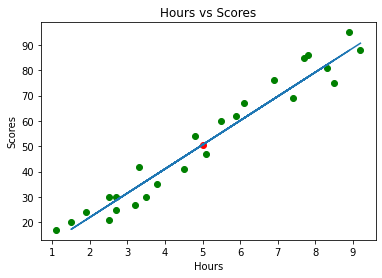

In [41]:
# Now we are gonna do smth differently we are gonnna predict from the training set which is normaly a no no we do this to show
Y_predictions_For_Training_X = lin_model.predict(X_train)

# use the scatter method to create a scatter plot
plt.scatter(x= source['Hours'], y= source['Scores'], color='green')
plt.plot(X_train, Y_predictions_For_Training_X) # the predictions vs the dataset 

plt.scatter(x=5, y=lin_model.predict([[5]]), color="red")
#  label the axioms 
plt.xlabel("Hours")
plt.ylabel("Scores")

# Title of the plot

plt.title("Hours vs Scores")

plt.show()